<h1>AIM: </h1> <p>In this notebook, we try to predict the score of students based on various independent parameters.   </p>

<h1>Libraries Used</h1>
<ol>
    <li> <b> Data Handling : </b> <p> We have Pandas and a NumPy library to handle and manipulate the data. These frameworks will not only help us in loading the data but also allow us to perform various actions to manipulate and mutate the data according to our requirements </p></li>
    <li> <b> Data Visualisation : </b> <p> We all Know that Data Visualisation is equally important while performing analysis. Visualisation gives us a mental picture, allowing us to for correlations easily. For data visaualisations we will use matplotlib and seaborn libraries </p> </li>
    <li> <b> Model Traing and Evaluation : </b>  <p> For statistical modelling we have used, SkLearn and Pytorch librarie.  </p> </li>
</ol>

In [1]:
# to ignoret he warnings 
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd
import pickle
import scipy.stats as stats 
import random
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, fbeta_score, f1_score, roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import  SVC



# Load Data

<p> Our data is in CSV format. To load the data to our python script, we will use pandas function "read_csv", which takes an argument as the file path! Once the data is loaded, it is loaded as DataFrame type (pandas.DataFrame — pandas 1.4.2 documentation, 2022) <p>

In [2]:
# Load the data set 
data = pd.read_csv("cs98x-22-dl-task2/train.csv")

# drop the feature 'id' as that does not give any significant information. 
# Thr axis has to be set to 1. this will eliminate the entire id column. 
data.drop( labels= ['id'], axis= 1, inplace= True )

# To have a glance of the data, we use ".head" function, 
# by default it shows first 5 records
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,16,U,GT3,A,0,3,teacher,services,...,5,4,2,1,0,4,2,8,13,7
1,MS,M,17,U,GT3,T,4,0,other,services,...,4,2,4,2,2,1,28,12,10,12
2,MS,F,17,U,LE3,T,1,0,services,at_home,...,4,4,2,1,2,2,3,11,9,8
3,GP,M,17,R,LE3,T,2,2,health,other,...,2,4,2,2,2,4,2,16,15,9
4,MS,F,14,R,LE3,T,0,1,health,teacher,...,3,3,2,2,1,4,0,9,14,8


<p>
    # Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:<br>
    1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
    2 sex - student's sex (binary: 'F' - female or 'M' - male)<br>
    3 age - student's age (numeric: from 15 to 22)<br>
    4 address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
    5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) <br>
    6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
    7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)<br>
    8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)<br>
    9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
    10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
    11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>
    12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>
    13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
    14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
    15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
    16 schoolsup - extra educational support (binary: yes or no)<br>
    17 famsup - family educational support (binary: yes or no)<br>
    18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
    19 activities - extra-curricular activities (binary: yes or no)<br>
    20 nursery - attended nursery school (binary: yes or no)<br>
    21 higher - wants to take higher education (binary: yes or no)<br>
    22 internet - Internet access at home (binary: yes or no)<br>
    23 romantic - with a romantic relationship (binary: yes or no)<br>
    24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
    25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
    26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
    27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
    28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
    29 health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
    30 absences - number of school absences (numeric: from 0 to 93)<br>

    # these grades are related with the course subject, Math or Portuguese:<br>
    31 G1 - first period grade (numeric: from 0 to 20)<br>
    31 G2 - second period grade (numeric: from 0 to 20)<br>
    32 G3 - final grade (numeric: from 0 to 20, output target)<br>
</p>

# Exploratory Data Analysis

### Data Shape

In [3]:
# Size of data set
data.shape

(20064, 33)

<p> From the shape of the data set, we can see that we have 20064 records and the number of dependent and independent features are 33. The target varibale here is "Grade" </p>
<hr>

### Handling Null Values

In [4]:
# see the number of null values 

# iterate through every column name in data farme
for feature_name in data.columns:
    
    # using "isna()" function find the NaNa values, returns  boolian 
    # if True, count it as a NaNa 
    print(f"{feature_name} -> {data[feature_name].isna().sum()}")

school -> 0
sex -> 0
age -> 0
address -> 0
famsize -> 0
Pstatus -> 0
Medu -> 0
Fedu -> 0
Mjob -> 0
Fjob -> 0
reason -> 0
guardian -> 0
traveltime -> 0
studytime -> 0
failures -> 0
schoolsup -> 0
famsup -> 0
paid -> 0
activities -> 0
nursery -> 0
higher -> 0
internet -> 0
romantic -> 0
famrel -> 0
freetime -> 0
goout -> 0
Dalc -> 0
Walc -> 0
health -> 0
absences -> 0
G1 -> 0
G2 -> 0
Grade -> 0


<p>
    We do not have any missing values, as we see from the above output. 
</p>
<hr>

### Label Encoding 

<p>
    We know that only the numerical data can be processed by computers. we can encode the categorical data into numbers in various ways. Method we are implementing here is LabelEncoding. This method creates a key value pair for every categorical values. To implement this we have SkLearns class "LabelEncoder"
</p>

In [5]:
# Label Encode the Values

# for every feature, we store the object of LabelEncoder
la_dct = {}

# iterate over every categorical columns 
for i in data.select_dtypes(np.object_).columns:
    
    # store the name of the feature as the key 
    # the object of the Labelencoder for that calss as a value
    la_dct[i] = LabelEncoder().fit(data[i].values)
    
    # Transform the data to numerical
    data[i] = la_dct[i].transform(data[i].values)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20064 entries, 0 to 20063
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      20064 non-null  int64
 1   sex         20064 non-null  int64
 2   age         20064 non-null  int64
 3   address     20064 non-null  int64
 4   famsize     20064 non-null  int64
 5   Pstatus     20064 non-null  int64
 6   Medu        20064 non-null  int64
 7   Fedu        20064 non-null  int64
 8   Mjob        20064 non-null  int64
 9   Fjob        20064 non-null  int64
 10  reason      20064 non-null  int64
 11  guardian    20064 non-null  int64
 12  traveltime  20064 non-null  int64
 13  studytime   20064 non-null  int64
 14  failures    20064 non-null  int64
 15  schoolsup   20064 non-null  int64
 16  famsup      20064 non-null  int64
 17  paid        20064 non-null  int64
 18  activities  20064 non-null  int64
 19  nursery     20064 non-null  int64
 20  higher      20064 non-null  

<hr>

### Visualisation of Data Distribution

<p>
    Let us now visualise the data distribution of categorical values. This is a necessary process as this will allow us to see what features are biased; as a result, we can drop the features that have less variance
</p>

school
0    13620
1     6444
Name: school, dtype: int64


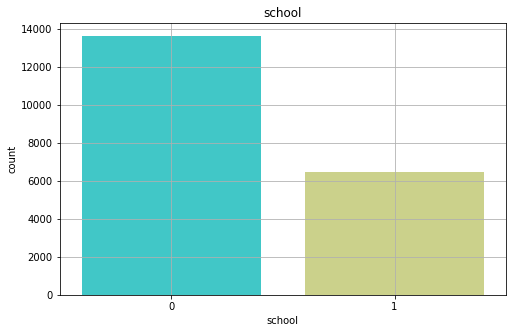

sex
0    11161
1     8903
Name: sex, dtype: int64


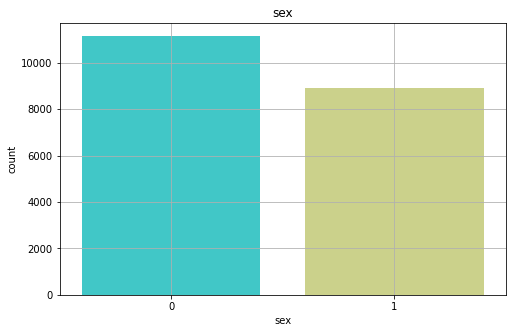

age
16    7056
14    4629
17    3724
15    3712
18     672
19     210
20      56
21       5
Name: age, dtype: int64


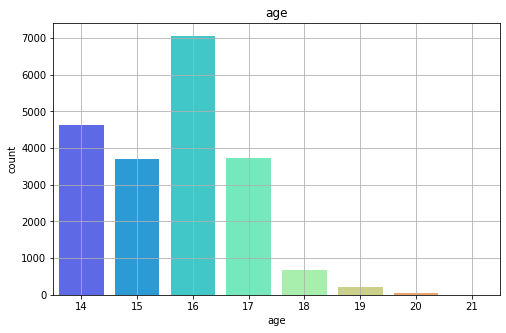

address
1    14907
0     5157
Name: address, dtype: int64


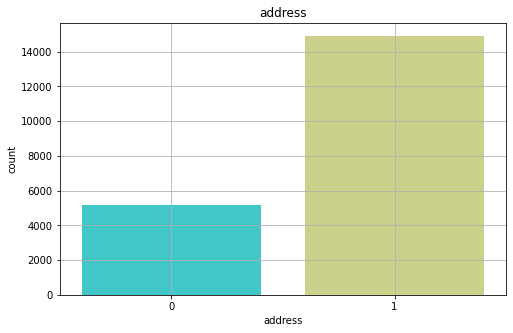

famsize
0    13642
1     6422
Name: famsize, dtype: int64


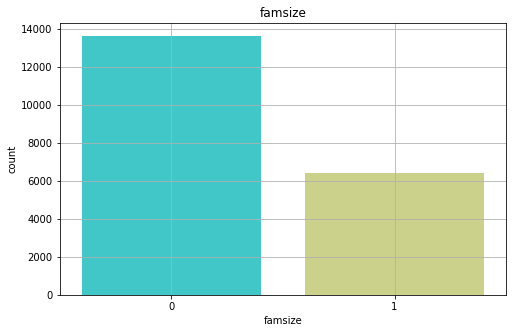

Pstatus
1    16953
0     3111
Name: Pstatus, dtype: int64


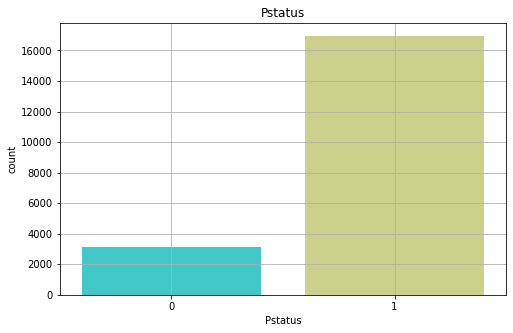

Medu
3    5904
2    5629
4    4727
1    2928
0     876
Name: Medu, dtype: int64


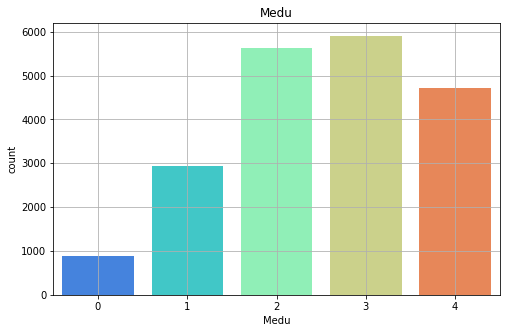

Fedu
1    7617
2    5186
3    3690
0    3053
4     518
Name: Fedu, dtype: int64


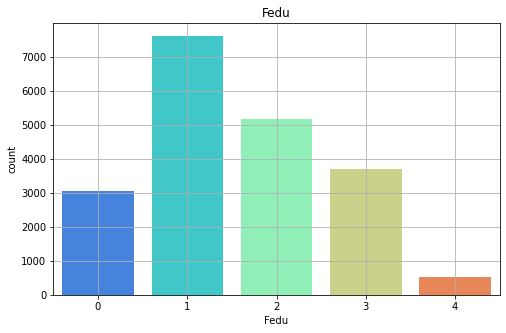

Mjob
2    7007
0    4441
3    4032
4    2309
1    2275
Name: Mjob, dtype: int64


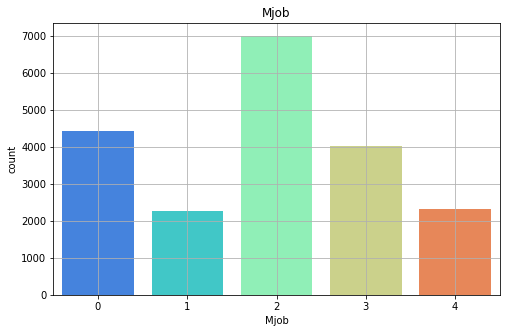

Fjob
2    8892
3    4100
4    2721
0    2400
1    1951
Name: Fjob, dtype: int64


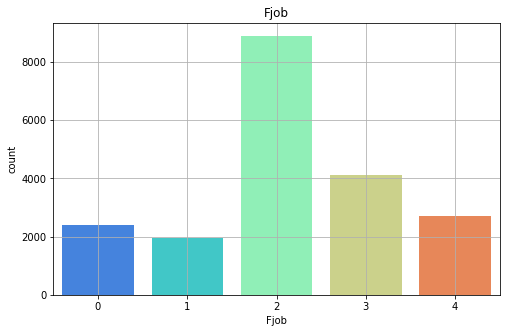

reason
0    8202
1    6318
3    3173
2    2371
Name: reason, dtype: int64


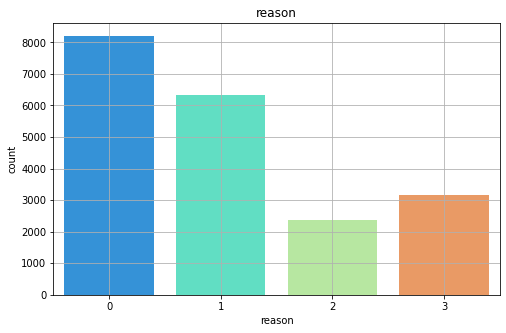

guardian
1    12584
0     4106
2     3374
Name: guardian, dtype: int64


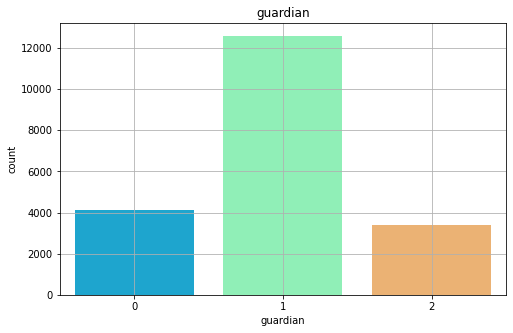

traveltime
1    10961
2     4655
3     2219
5      909
4      672
0      637
6       11
Name: traveltime, dtype: int64


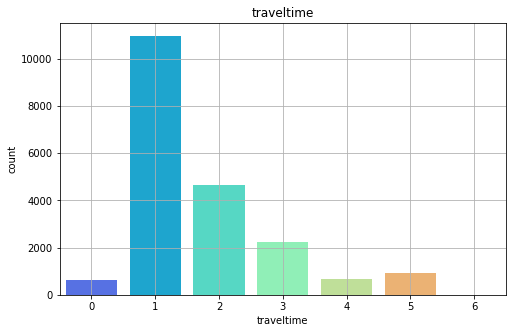

studytime
1    7913
2    6630
0    2579
3    2041
4     875
5      26
Name: studytime, dtype: int64


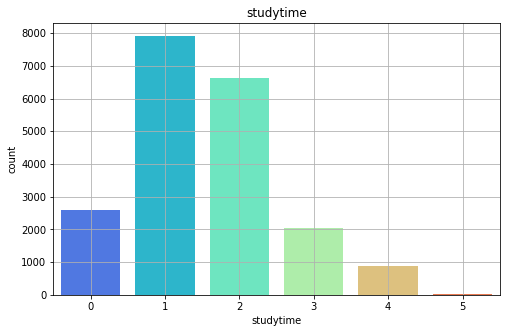

failures
0    18180
1     1205
2      545
3      130
4        4
Name: failures, dtype: int64


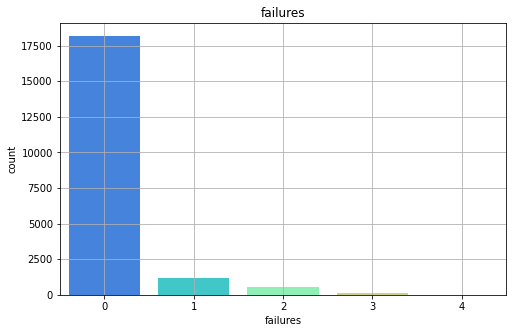

schoolsup
0    16903
1     3161
Name: schoolsup, dtype: int64


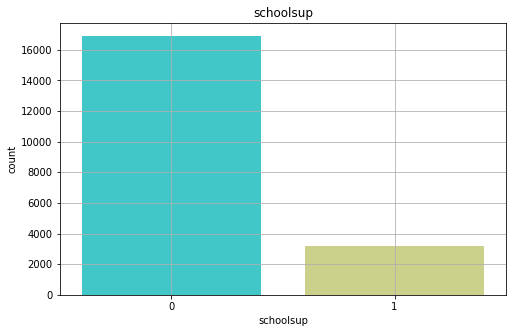

famsup
1    15116
0     4948
Name: famsup, dtype: int64


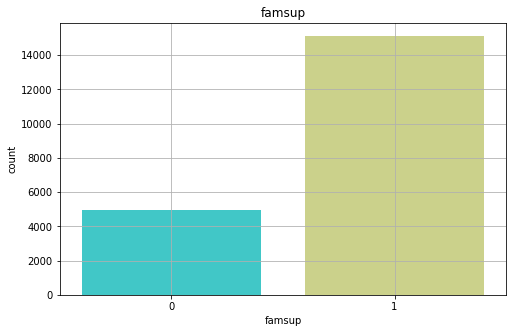

paid
0    15950
1     4114
Name: paid, dtype: int64


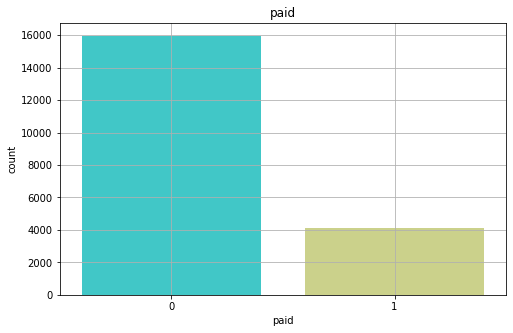

activities
0    10439
1     9625
Name: activities, dtype: int64


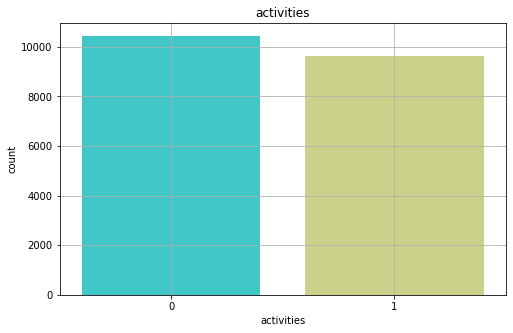

nursery
1    15963
0     4101
Name: nursery, dtype: int64


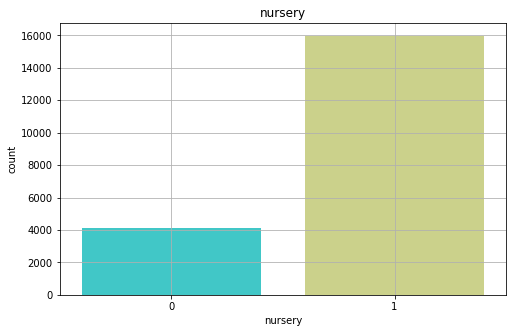

higher
1    16361
0     3703
Name: higher, dtype: int64


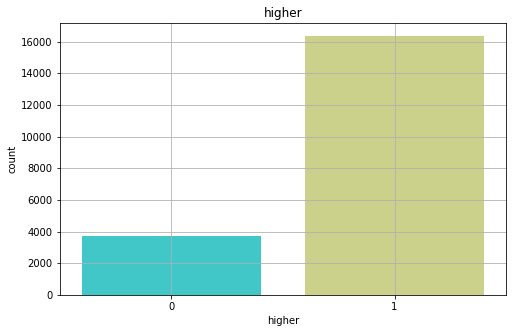

internet
1    16115
0     3949
Name: internet, dtype: int64


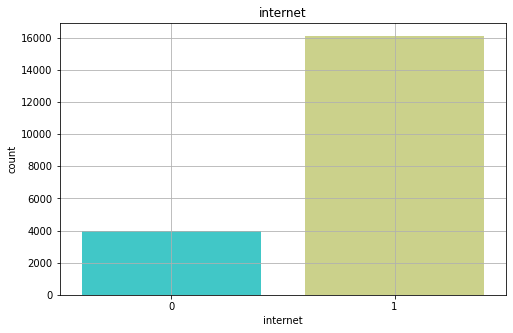

romantic
0    13018
1     7046
Name: romantic, dtype: int64


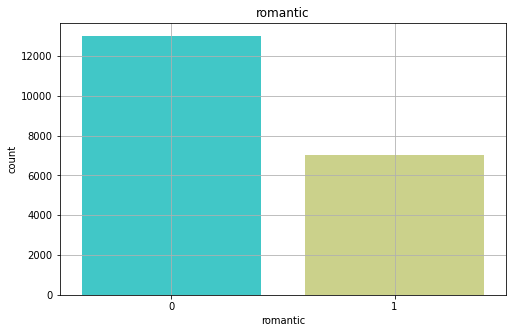

famrel
4    9821
5    5255
3    3802
2     923
1     233
0      30
Name: famrel, dtype: int64


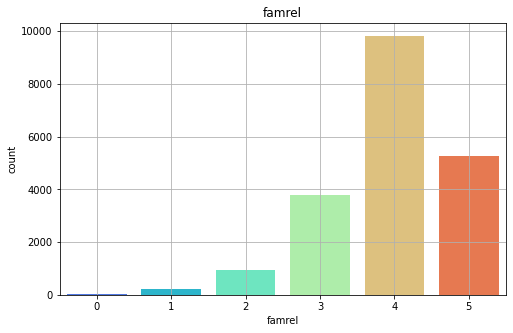

freetime
3    7495
4    4767
2    4425
1    1530
5    1053
0     794
Name: freetime, dtype: int64


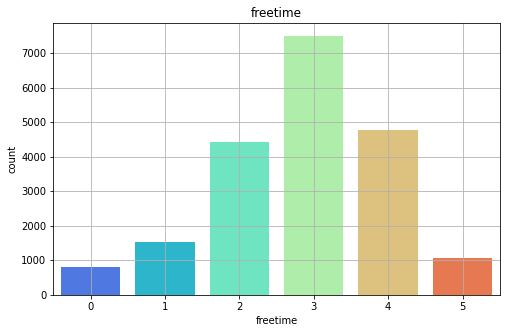

goout
2    6402
1    4906
4    3529
3    3238
0    1573
5     416
Name: goout, dtype: int64


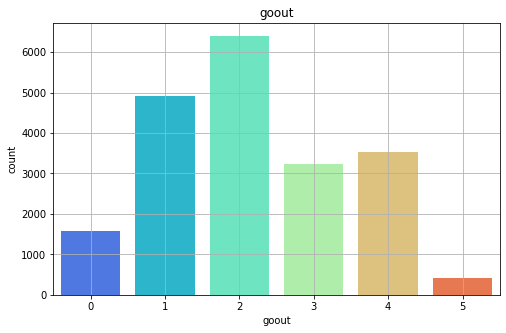

Dalc
1    11256
2     3503
3     1517
0     1149
5     1145
6      867
4      588
7       39
Name: Dalc, dtype: int64


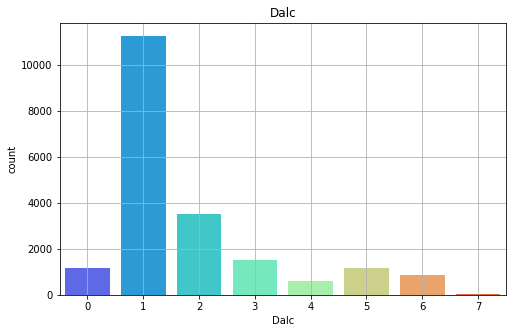

Walc
1    6656
2    5029
3    2533
0    2415
4    2337
5     964
6     130
Name: Walc, dtype: int64


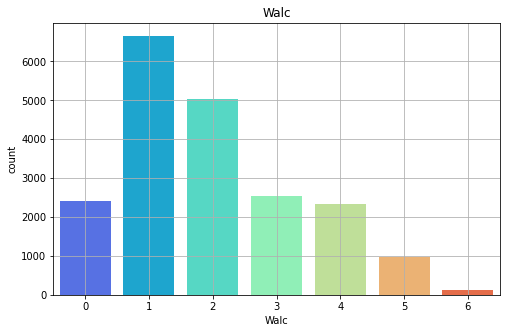

health
4    8807
3    3466
2    2693
1    2387
0    2026
5     685
Name: health, dtype: int64


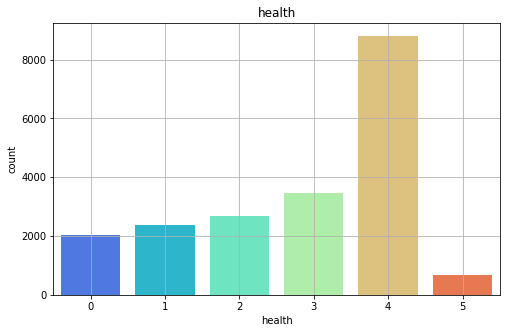

absences
0     9129
1     3016
2     2538
3     1843
4     1155
5      658
6      352
7      262
8      210
9      147
10     121
11     112
12      73
13      58
14      53
15      45
17      36
16      33
19      30
18      27
21      23
20      21
22      20
24      17
23      17
27      11
30      10
26       8
25       8
31       5
32       5
29       5
34       4
28       3
37       3
33       3
39       1
38       1
35       1
Name: absences, dtype: int64


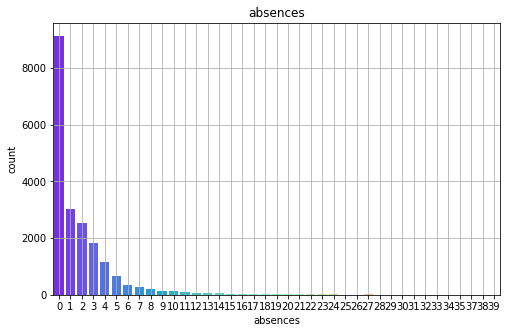

G1
14    2549
15    2464
13    2226
12    1924
16    1899
11    1544
17    1421
18    1323
10    1096
19    1041
9      781
20     540
8      511
7      325
6      172
21     104
5       75
4       32
3       14
22      13
2        7
0        2
1        1
Name: G1, dtype: int64


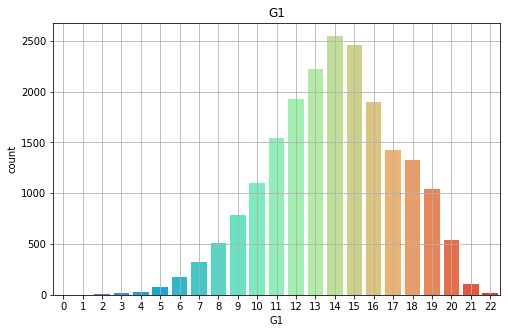

G2
12    2507
13    2375
11    2227
14    2224
10    1800
15    1722
9     1364
16    1196
8      963
17     839
7      625
18     610
19     387
6      343
20     204
5      195
0      102
4       90
3       88
2       74
1       64
21      63
22       2
Name: G2, dtype: int64


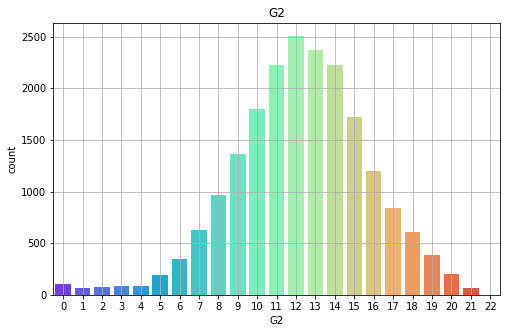

In [6]:
# Data Distribution 
for colm in data.select_dtypes(np.number).columns[:-1]:
    
    # get values of the caegorical features 
    var = data[colm]
    
    # count the number of unique values in each feature
    var_c = var.value_counts()
    
    # print the count of each classes
    print(f"{colm}\n{var_c}")
        
    plt.figure(figsize=(8,5))
    sns.countplot(x=colm ,data=data, palette='rainbow' )
    plt.title(colm)
    plt.grid()
    plt.show()

<p>
    The above plots show that the trainable parameters are highly biased towards one class. We must eliminate such features that will decrease the efficiency of making unbiased predictions. The Elimination criteria we have decided on here is; that if the minority class is less than 65% of the majority class, we drop the feature.<br>
    
The features that we will drop are:
    <ol>
        <li>Address</li>
        <li>Pstatus</li>
        <li>schoolsup</li>
        <li>guardian</li>
        <li>famsup</li>
        <li>paid</li>
        <li>nuresey</li>
        <li>higher</li>
        <li>internet</li>
        <li>failures</li>
        <li>absences</li>
    </ol>
</p>


In [7]:
features_to_drop = ["address","Pstatus","schoolsup","guardian",
                    "famsup","nursery","higher","internet","paid",
                   "failures","absences"]

# drop the features 
data.drop(labels= features_to_drop, axis= 1, inplace= True)

<p>
    Using the drop function we have dropt the more biased features. Now moving ahead let's analyse the class distribution of dependent variable
</p>
<hr>

### Visualisation of Output Classes

<p>
    While working with statistical modelling, we must have balanced data. Balanced data is when there is an equal number of classes in the output feature. If the number of the class is imbalanced, the prediction might result to a biased output. We usually under-sample or oversample the data to generate synthetic data points to handle this.
</p>

9     10564
8      4857
10     1616
11     1133
7       746
13      456
14      310
6       229
12       80
5        47
18       19
17        5
16        2
Name: Grade, dtype: int64



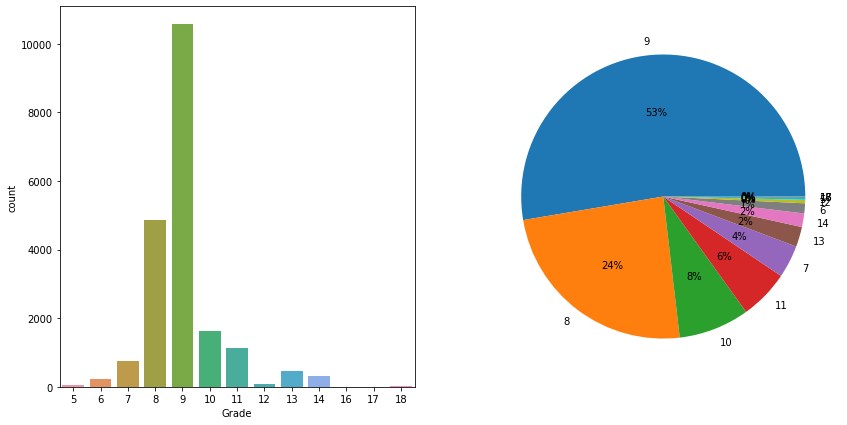

In [8]:
# Class distribution of Output/dependent feature


# prints the count of each class 
print( data['Grade'].value_counts() )
print()

plt.figure(figsize= (14, 7))
plt.subplot(1, 2, 1)
sns.countplot(x = 'Grade' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['Grade'].value_counts(), 
        labels= [ i for i in data['Grade'].value_counts().keys() ], autopct='%.0f%%')

plt.show()

<p>
    As you see here the number of data for the class 9 and 8 is very high. we will randomly selected and eliminate the record to reduce the biasness
</p>

In [9]:
threshold = 1100

# Randomly drop the records from the first two significant classes
for i in data['Grade'].value_counts().keys()[:4]:
    data.drop( index = random.sample( list(data[data['Grade'] == i].index.values),
                                    data['Grade'].value_counts()[i] - threshold), 
              axis = 0, inplace= True )

8     1100
10    1100
11    1100
9     1100
7      746
13     456
14     310
6      229
12      80
5       47
18      19
17       5
16       2
Name: Grade, dtype: int64



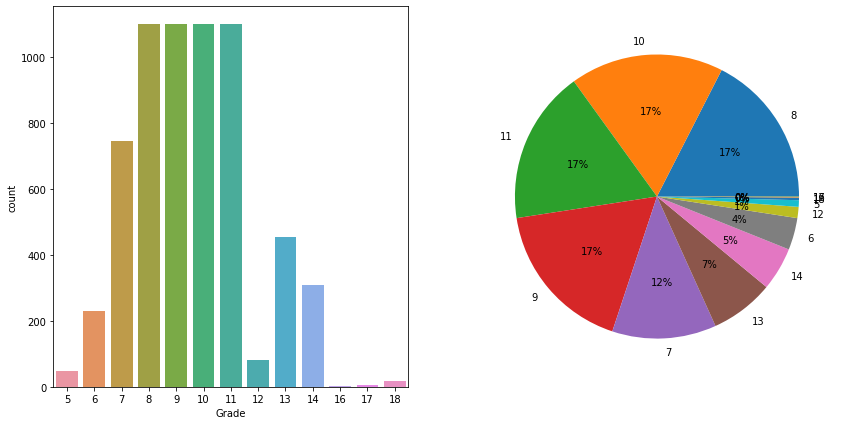

In [10]:
# Class distribution of Output/dependent feature

print( data['Grade'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'Grade' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['Grade'].value_counts() , 
        labels= [ i for i in data['Grade'].value_counts().keys() ], 
        autopct='%.0f%%')

plt.show()

<p>
    As we see here even after randomly dropping the records we still have imbalance class, to over come this issue we will use SMOTE to generate our synthetic data   
</p>

5     1100
6     1100
7     1100
8     1100
9     1100
10    1100
11    1100
12    1100
13    1100
14    1100
16    1100
17    1100
18    1100
Name: Grade, dtype: int64



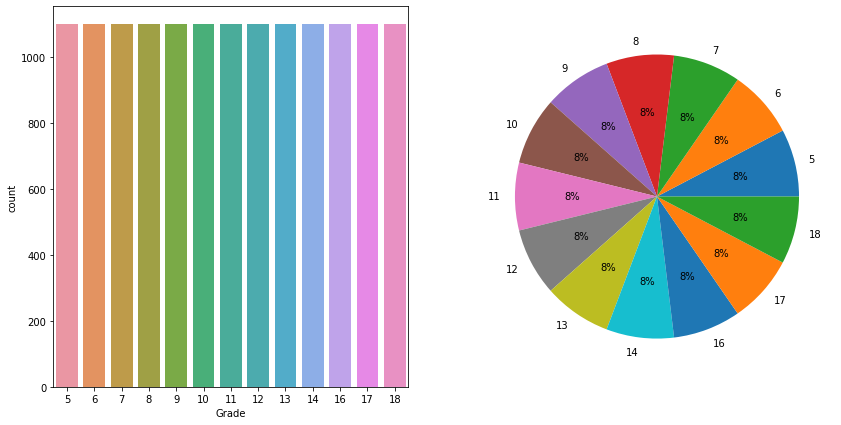

In [11]:

n_samples=int(1100)

def sampling_strategy(X,y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy


# under sampling 
under_sampler = ClusterCentroids(
    sampling_strategy=sampling_strategy(data.iloc[:,:-1],data.iloc[:,-1],
                                        n_samples,t='majority'))

X_under, y_under = under_sampler.fit_resample(data.iloc[:,:-1],
                                              data.iloc[:,-1])

# over sampling
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, 
                                                         y_under, 
                                                         n_samples, 
                                                         t='minority'), 
                     k_neighbors=1)

X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)


data = X_bal.copy()
data['Grade'] = y_bal

print( data['Grade'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'Grade' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['Grade'].value_counts(), 
        labels= [ i for i in data['Grade'].value_counts().keys() ], 
        autopct='%.0f%%')

plt.show()



<hr>

In [12]:
# shuffle the data randomly
data = data.sample(n = data.shape[0])
data.head()

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,Grade
7230,1,0,15,0,3,2,2,2,2,2,...,1,3,2,3,2,1,0,18,5,5
10634,0,1,16,0,3,1,2,1,1,1,...,0,4,3,1,1,2,3,15,19,14
2541,0,0,14,0,3,3,2,3,1,1,...,0,4,4,2,1,1,1,15,16,9
8229,0,0,15,0,3,2,2,2,0,1,...,0,1,2,1,1,1,0,14,11,7
2778,0,1,15,0,2,3,1,4,0,1,...,1,4,2,2,1,3,4,15,15,9


<hr>

### Handle Outliers

<p style="text-align: justify "> 
    <ol>
        <li>What is an Anomaly/Outlier? </li> 
        <p>An outlier is a data point that differs significantly from other observations in statistics. An outlier can be the result of measurement variability or it can be the result of experimental error. In statistical analysis, an outlier might generate major consequences. </p>
        <li>Why Care about Anomaly? </li>
        <p>Detecting and correcting outliers is one of the most critical tasks in data preparation since they can have a detrimental impact on statistical analysis and the training process of a predictive model, resulting in reduced accuracy. </p>
        <li>Five Ways to detect Anomaly </li> 
        <p>Here are some of the ways to delt with outliers </p>
            <ol>
                <li> Standard Deviation </li>
                <li> Boxplots </li>
                <li> DBScan Clustering </li>
                <li> Isolation Forest </li>
                <li> Robust Random Cut Forest </li>
            </ol>
    </ol>
</p>

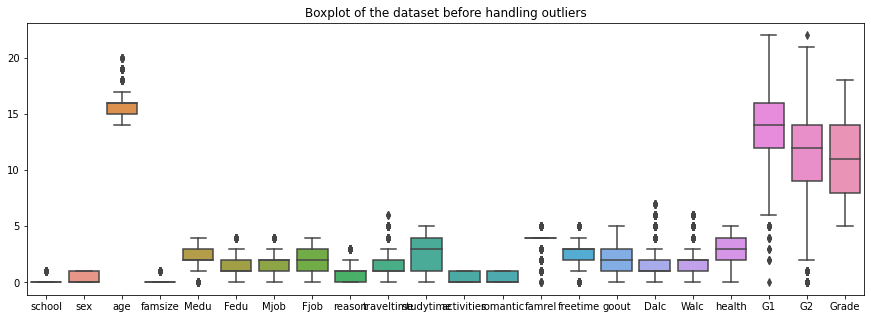

In [13]:
#outliers in the dataset

plt.figure(figsize=(15,5))
sns.boxplot(data=data)
plt.title('Boxplot of the dataset before handling outliers')
plt.show()

<p>
    Here we are going to use Inter quartilie method to determine the Lower and Upper bound. The IQR is obtained by finding the difference between the upper quartile and the lower  quartile. Any data that is outide the IQR range is considered as an outlier and that record is eliminated (Outlier detection 101: Median and Interquartile range., 2022)
</p>

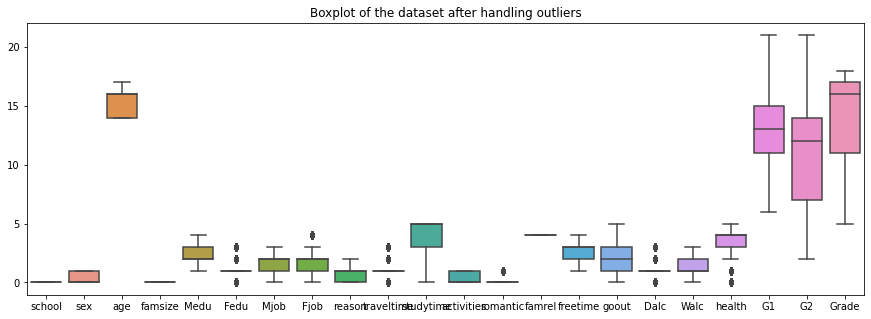

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR))|(data > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(15,5))
sns.boxplot(data=data)
plt.title('Boxplot of the dataset after handling outliers')
plt.show()

<hr>

<p>
Identification of relevant features is an essential step for making a robust model. This can be done in one of two ways <b>Feature Selection</b> and <b>Feature Extraction</b> 
</p>

### Feature Selection

<p>
    Feature selection is the technique where we select the relevant feature <b> without transforming our data points </b>
</p>

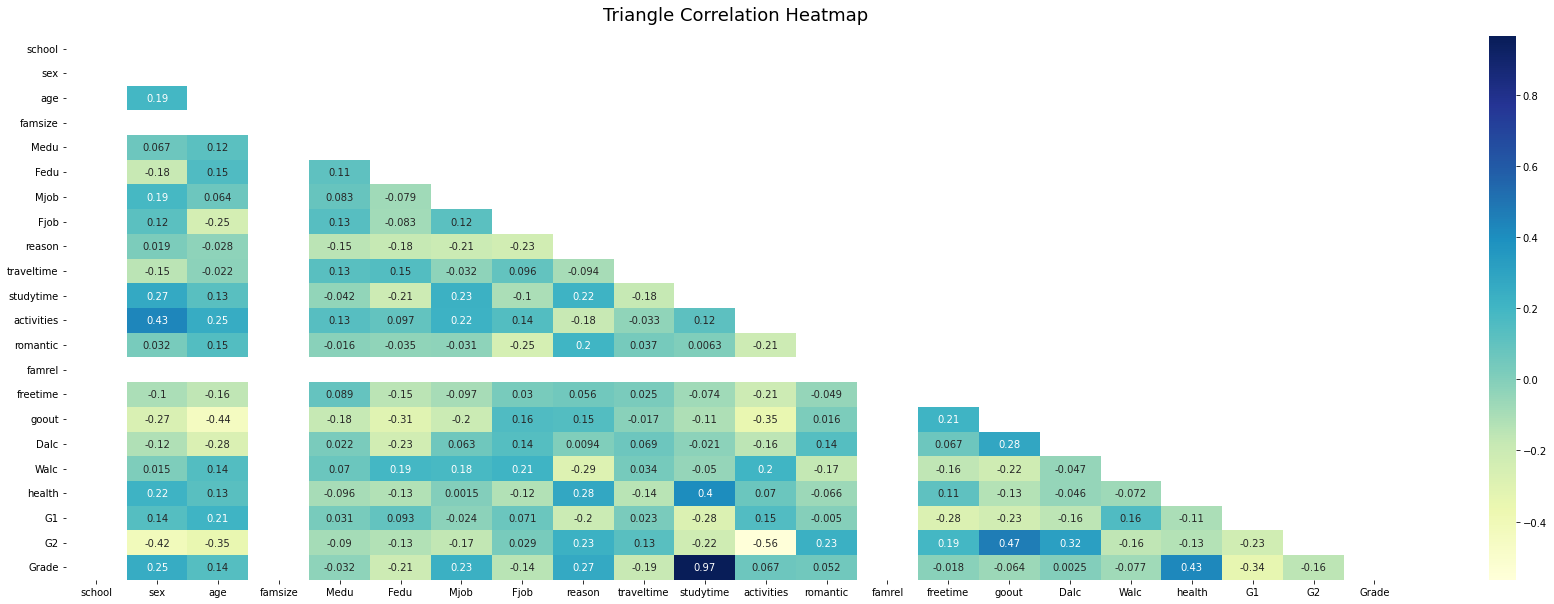

In [15]:
# Corelation Matrix

plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [16]:
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data

    mean = sum(data) / n

    # Square deviations

    deviations = [(x - mean) ** 2 for x in data]

    # Variance

    variance = sum(deviations) / n

    return variance

<p>
    When a feature has a broader variance, the data is more generic. This means that we have more parameters to learn and identify a pattern. Any data point that has less variance is dropped
</p>

In [17]:
for i in data.columns[:-1]:
    print(f" {i} -> {variance(data[i].values)} ")

 school -> 0.0 
 sex -> 0.24499035416330892 
 age -> 1.0549355365938946 
 famsize -> 0.0 
 Medu -> 0.6324091062903792 
 Fedu -> 0.7078958986529712 
 Mjob -> 0.7074479465792718 
 Fjob -> 1.0102557916227788 
 reason -> 0.5088777572403532 
 traveltime -> 0.2601067166632217 
 studytime -> 2.7960037245308422 
 activities -> 0.24522887409864327 
 romantic -> 0.17112811526265445 
 famrel -> 0.0 
 freetime -> 0.5373396009994633 
 goout -> 1.428084138715179 
 Dalc -> 0.3167887330680761 
 Walc -> 0.7759180351128397 
 health -> 1.4747580945683345 
 G1 -> 8.068734221890214 
 G2 -> 21.393235099533594 


In [18]:
for i in data.columns[:-1]:
    if variance(data[i].values) <= 0.5:
        data.drop(labels=[i], axis = 1, inplace= True)
        features_to_drop.append(i)

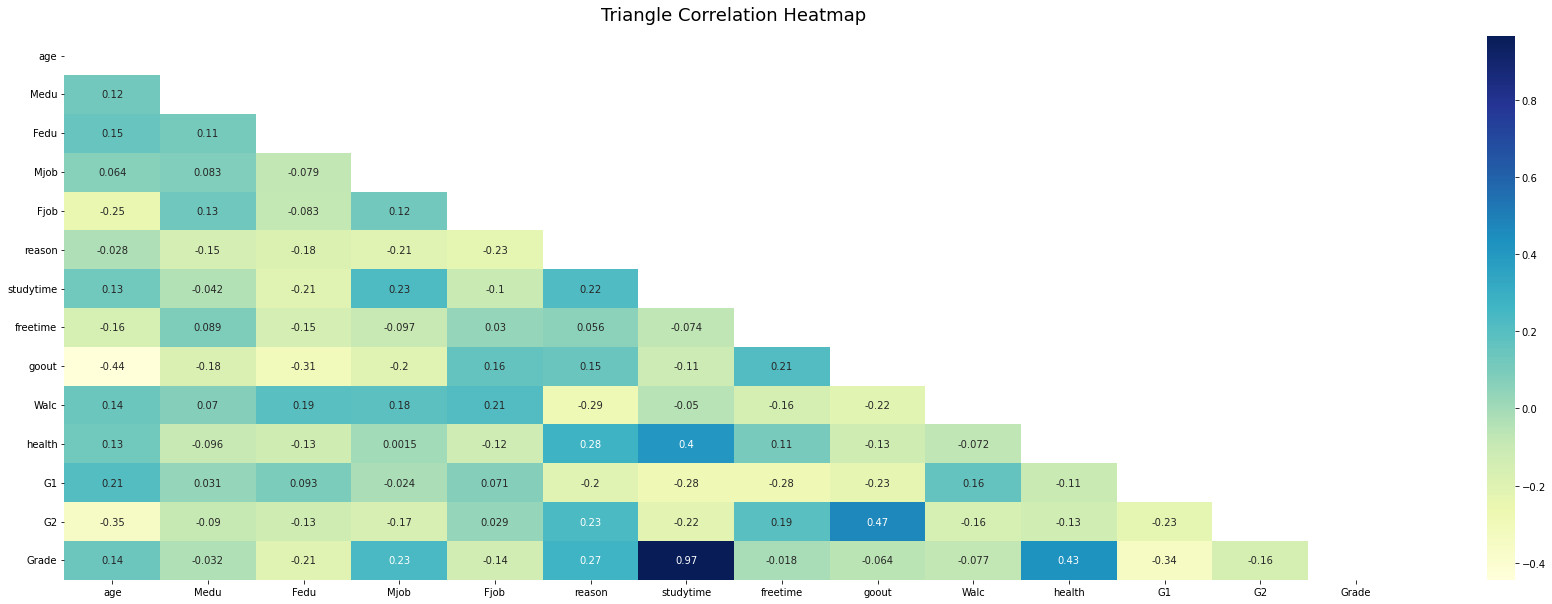

In [19]:
# Corelation Matrix

plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<p>
    Here we have dropped eight less correlated features to the "Grade" feature. Second heat map, we can see here that most of the data is highly correlated to the output feature. 
</p>

<hr>

### Feature Extraction

<p> 
    Feature Extraction is the process of selection of features by transforming the data points into principle components
</p>

<p>
Principal component analysis (PCA) is the technique of computing the principal components and using them to change the basis of the data, often simply using the first few and disregarding the rest. (A One-Stop Shop for Principal Component Analysis, 2022)
</p>

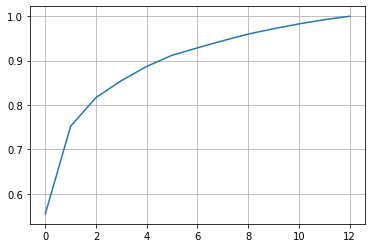

In [20]:
pca = PCA(n_components= None)
pca.fit_transform(data.iloc[:, :-1].values)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [21]:
# cummuliative sum of varience 

np.cumsum(pca.explained_variance_ratio_)

array([0.55437184, 0.75207171, 0.81691788, 0.85475253, 0.88703694,
       0.91203148, 0.92874807, 0.94480537, 0.95983219, 0.97191944,
       0.98273835, 0.99226416, 1.        ])

<p>
    The cumulative sum of the variance shows that after the values are not flattening. What this mean is, all the nine features are important towards data modelling. Here we will be selecting the top 5 principle components 
</p>

In [22]:
n = 6

pca = PCA(n_components= n)

most_valued_data_points = pca.fit_transform(data.iloc[:, :-1].values)


DATA = pd.DataFrame(data = most_valued_data_points , columns = [ f"PC-{i}" for i in range(n)] )

DATA['Grade'] = data.iloc[:, -1].values

data = DATA.copy()
DATA.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5,Grade
0,7.123899,2.901545,-2.004009,1.926142,-1.268913,0.081500,14
1,4.782014,3.169269,1.799053,-0.041426,-1.453983,0.050610,9
2,3.583777,3.302097,1.510988,0.466188,-0.900647,-2.850821,9
3,0.072843,4.381952,-1.124867,-0.525064,0.158010,-1.090724,12
4,-0.138059,4.331750,-1.629793,0.528448,-0.602979,-1.077237,13


<hr>

### Splitting Data

<p>
    Data splitting, or commonly known as train-test split, is the partitioning of data into subsets for model training and evaluation separately (Data Splitting for Model Evaluation, 2022) . This method will allow us to see if the model is over fitting or not. The test data is the unseen data that has not been used for training. We have selected 80 percent of the data for training and 20 percent of the data for validation
</p>

In [23]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split( data.iloc[:, :-1].values, data.iloc[:, -1].values, test_size=0.25)

### Data Scalling 

<p>
    To ensure that all the features are in the same range, we will scale all the features to the same range. Thus ensures that our model is not biased towards the features that are of high volume
</p>

In [24]:
# scaling and normalisation 

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

<hr>

# Model Training and Analysis 

### Define helper function 

In [25]:

def classification_Report(model ,y_pred, model_name):
    """
    input  : object of the model, predicted
    output : returns various metrics to understand model performance 
    """
    
    # sklearns classification report function
    print( classification_report(y_test ,y_pred) )
    
    # Confusion matrix
    plt.figure(figsize= (15,15))
    cf_matrix = confusion_matrix(y_test, y_pred)
    hm = sns.heatmap((cf_matrix/np.sum(cf_matrix))*2 , annot=True, fmt='.2%', xticklabels=[ i for i in data.Grade.unique() ], yticklabels=[ i for i in data.Grade.unique() ])
    hm.set_xlabel("Predicted Values", fontsize = 15)
    hm.set_ylabel("Actual Values", fontsize = 15)
    plt.show()
    

In [26]:
def model_Trainer(model_obj, model_name):
    """
    input:
        model_obj  : object of our model 
        model_name : string input 
    returns:
        Generates predictions and classification report
        trained model
    """
    model_obj.fit(X_train, y_train)
    
    y_pred = model_obj.predict(X_test)

    classification_Report(model_obj, y_pred ,model_name)
    
    return model_obj

### Machine Learning Approaches

<p>
    In the machine learning approaches, we will use Decission Tree, Randome Forest, SVM classifier and AdaBoost Classifier. To assess the performance we will analise the model using confusion matrix, accuracy score and f1-score 
</p>

              precision    recall  f1-score   support

           5       0.88      0.97      0.92        73
           6       0.82      0.89      0.86        47
           7       0.36      0.21      0.26        39
           8       0.10      0.05      0.06        21
           9       0.33      0.38      0.36        26
          10       0.32      0.32      0.32        25
          11       0.21      0.19      0.20        21
          12       0.86      1.00      0.92        30
          13       0.76      0.81      0.78        67
          14       0.86      0.89      0.87        80
          16       0.99      1.00      0.99       202
          17       0.99      1.00      1.00       197
          18       1.00      0.96      0.98        52

    accuracy                           0.85       880
   macro avg       0.65      0.67      0.66       880
weighted avg       0.83      0.85      0.84       880



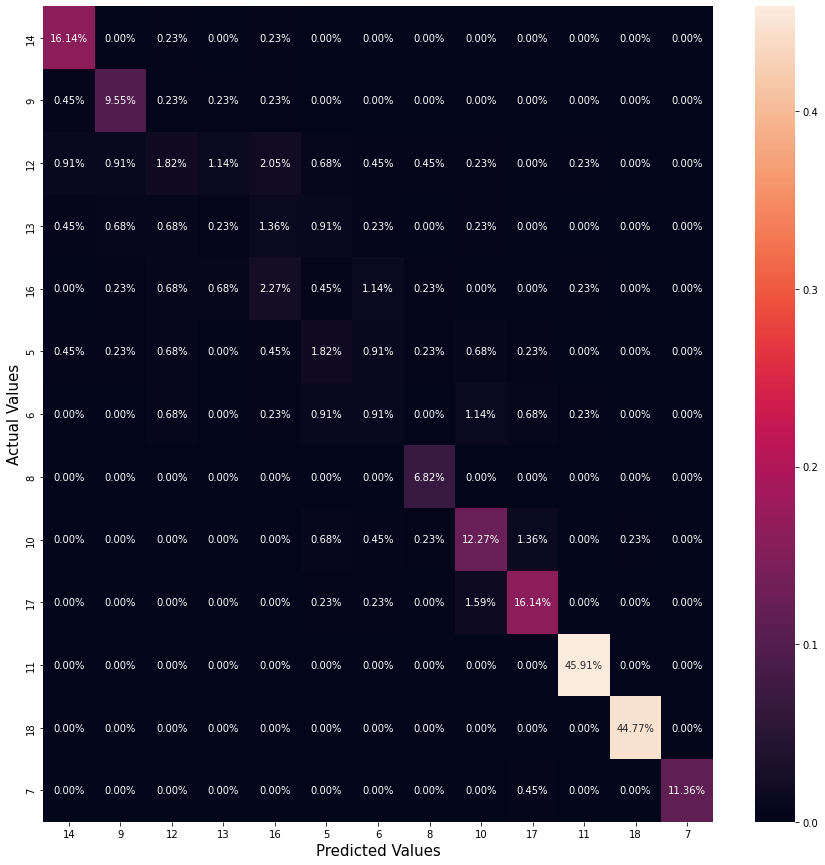

In [27]:
# Create a object of model
Decision_Tree = DecisionTreeClassifier()

# Train the model and generate report
Decision_Tree = model_Trainer(Decision_Tree , "Decision_Tree")

              precision    recall  f1-score   support

           5       0.90      0.99      0.94        73
           6       0.74      0.91      0.82        47
           7       0.35      0.28      0.31        39
           8       0.23      0.14      0.18        21
           9       0.27      0.23      0.25        26
          10       0.19      0.12      0.15        25
          11       0.22      0.19      0.21        21
          12       0.88      1.00      0.94        30
          13       0.79      0.81      0.80        67
          14       0.84      0.94      0.89        80
          16       0.99      1.00      1.00       202
          17       1.00      1.00      1.00       197
          18       1.00      0.96      0.98        52

    accuracy                           0.85       880
   macro avg       0.65      0.66      0.65       880
weighted avg       0.83      0.85      0.84       880



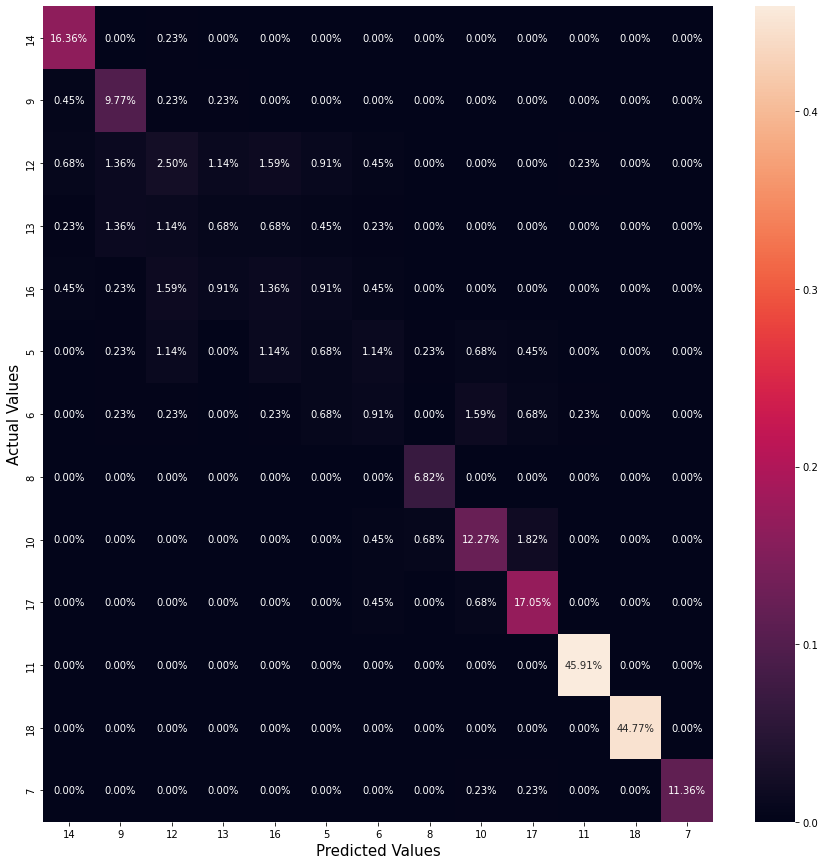

In [28]:
# Create a object of model
Random_Forest = RandomForestClassifier()

# Train the model and generate report
Decision_Tree_Tuned = model_Trainer(Random_Forest, "Random_Forest")

              precision    recall  f1-score   support

           5       0.67      0.99      0.80        73
           6       0.52      0.66      0.58        47
           7       0.40      0.21      0.27        39
           8       0.00      0.00      0.00        21
           9       0.31      0.19      0.24        26
          10       0.42      0.32      0.36        25
          11       0.56      0.48      0.51        21
          12       0.70      0.93      0.80        30
          13       0.82      0.49      0.62        67
          14       0.73      0.94      0.82        80
          16       1.00      1.00      1.00       202
          17       1.00      1.00      1.00       197
          18       0.95      1.00      0.97        52

    accuracy                           0.82       880
   macro avg       0.62      0.63      0.61       880
weighted avg       0.80      0.82      0.80       880



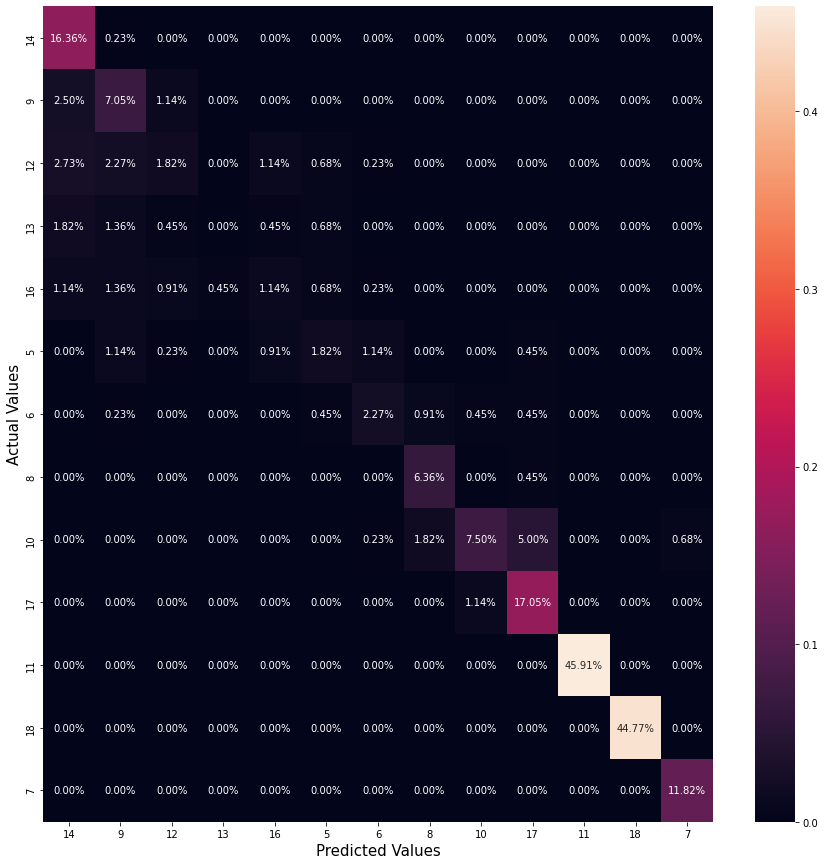

In [29]:
# Create a object of model
svm_classifier = SVC(probability=True)

# Train the model and generate report
svm_classifier = model_Trainer(svm_classifier, "svm_classifier")

              precision    recall  f1-score   support

           5       0.65      0.45      0.53        73
           6       0.30      0.06      0.11        47
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        21
          12       0.06      0.30      0.10        30
          13       0.00      0.00      0.00        67
          14       0.16      0.89      0.27        80
          16       1.00      0.08      0.15       202
          17       0.75      0.58      0.66       197
          18       0.96      0.50      0.66        52

    accuracy                           0.31       880
   macro avg       0.30      0.22      0.19       880
weighted avg       0.54      0.31      0.30       880



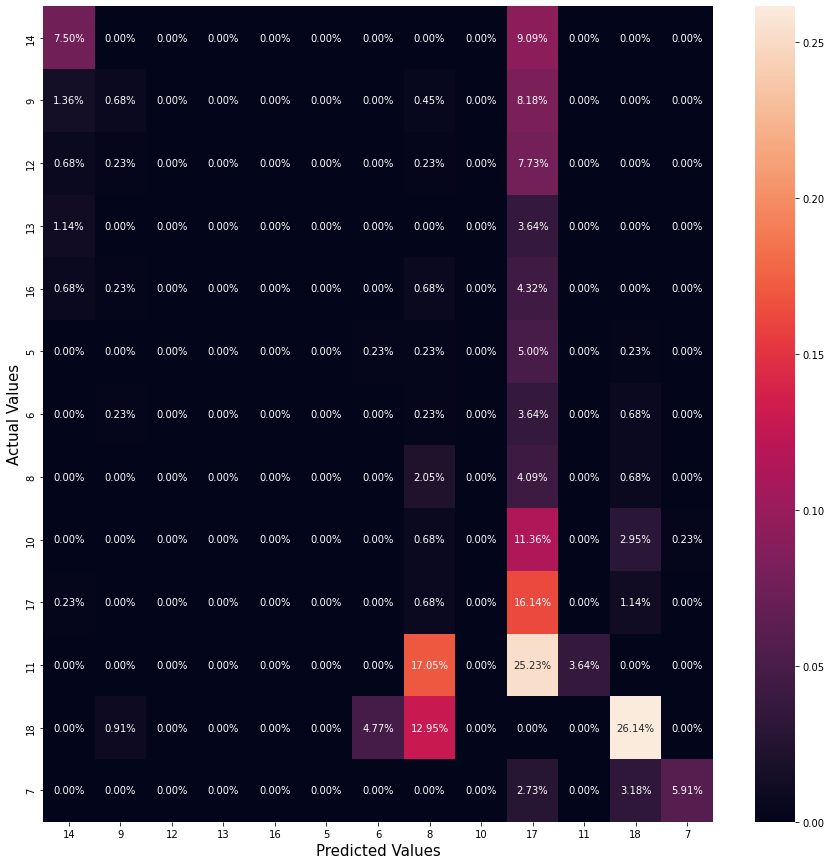

In [30]:
# Create a object of model
AdaBoost_Classifier = AdaBoostClassifier()

# Train the model and generate report
AdaBoost_Classifier = model_Trainer(AdaBoost_Classifier, "AdaBoost_Classifier")

<p>
    As we see here the machine learning models are underperforming. Although the accuracy of the model is high the f1 sore and number of correctly predicted values are very less. The model seem to be biased towards certain classess 
</p>
<hr>

### Deep Learning Approaches

<p>
    With a maching learning appoach we have a vey little flexibility while developing of the model. Although this is not the major factor for choosig a deep learning model, but with deep learning we have controle of the parameters like loss function, type of optimizers used, learning rate to name a few. With Deep learning we are able to identify and extract hidden patterns thus understanding relationships between a large number of interdependent variables (Understanding PyTorch with an example: a step-by-step tutorial, 2022)
</p>

In [31]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from torch.nn import functional as F

In [32]:
# convrt the data to tensor

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).type(torch.LongTensor).reshape(-1,1)
X_test  = torch.tensor(X_test).float()
y_test  = torch.tensor(y_test).type(torch.LongTensor).reshape(-1,1) 

<p>
    Now that we have converted the data into tensors, we will devide the training data into mini batches. With this we can handlethe large data set and also make it quicker for our model to train
</p>

In [33]:
# Convert the splitted data of tensors to TensorDataset
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# From the tensordata set to mini batches 
train_data = DataLoader( train_data, 
                        batch_size= int(X_train.shape[0]/4),  # the data set will be devided into 4 equal mini batches
                       shuffle= True, 
                       drop_last= True)

test_data = DataLoader( test_data, shuffle= True )

<p>
    Here we have define our model. we have one input layer that has 16 neurons, followed by a 5 dense layers. The output layer has 20 neuron with no activation function. This is because the loss function we are using is Cross Entropy Loss which already has the implemntation of Softmax. Here we get the probability values of the each neuron and the neuron that has the highest probability we select that indexas the class index 
</p>

In [34]:
# building ann classifier class 

class ANNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # input layer
        self.input = nn.Linear(X_train.shape[1], 16)
        
        # dense layers 
        self.dense_1 = nn.Linear(16, 32)
        self.dense_1_BN = nn.BatchNorm1d(32)
        
        self.dense_2 = nn.Linear(32, 64)
        self.dense_2_BN = nn.BatchNorm1d(64)
        
        self.dense_3 = nn.Linear(64, 128)
        self.dense_3_BN = nn.BatchNorm1d(128)
        
        self.dense_4 = nn.Linear(128, 64)
        self.dense_4_BN = nn.BatchNorm1d(64)
        
        self.dense_5 = nn.Linear(64, 64)
        self.dense_5_BN = nn.BatchNorm1d(64)
        
        # output layer
        self.output = nn.Linear(64,20)
        
    def forward(self,x):
        
        # input layer
        x = F.relu(self.input(x))
        # dense layer 1 
        x = self.dense_1(x)
        x = F.relu(self.dense_1_BN(x))
        
        
        
        # dense layer 2
        x = self.dense_2(x)
        x = F.relu(self.dense_2_BN(x))
       
        
        # dense layer 3 
        x = self.dense_3(x)
        x = F.relu(self.dense_3_BN(x))
        x = F.dropout(x, p = 0.5 , training= self.training )
        
        # dense layer 4 
        x = self.dense_4(x)
        x = F.relu(self.dense_4_BN(x))
        
       
        
        # dense layer 5 
        x = self.dense_5(x)
        x = F.relu(self.dense_5_BN(x))
    
        # output layer
        x = self.output(x) 
       
        
        return x

<p>
    The Loss function we are using here is  Cross Entropy loss, and the optimizer we use are Adam. 
</p>

In [35]:
# create a instance of a class
model = ANNClassifier()

# loss function 
loss_fun = nn.CrossEntropyLoss()


# optimizer 
optimizer = torch.optim.Adam(model.parameters() , lr= 0.002)  # L2 regularization

<p> 
    Here we have defined a function where we passthe object of the model and the number of epochs. We then have a a for loop that iterates over the number of epochs during the traing process we put our model in traing mode this ensures that the dropout layer is active while traing. During the validation process we put our model in eval mode that dissable the dropout layer
</p>

In [36]:
def model_train_and_validation(model, epoch):
    
    train_acc = []
    test_acc = []
    
    train_loss = []
    test_loss = []
    # loop over every epoch
    for epochi in range(epoch):
        
        # loop over traing data batches
        bach_acc = []
        bach_loss = []
        for x,y in train_data: 
            
            # forward propogation
            yHat = model(x) 
            
            # loss 
            loss = loss_fun(yHat, torch.squeeze(y) )
            bach_loss.append(loss.detach().numpy())
            
            
            # back propogation 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            # compute batch accuracy 
            bach_acc.append( accuracy_score(torch.argmax( yHat,dim =1) ,y) )
            
            
        # compute training accuracy and loss
        train_acc.append(np.mean(bach_acc))
        train_loss.append( np.mean(bach_loss) )
        
        # evaluation mode on
        model.eval()
        
        """
        x,y = next(iter( test_data ) )
        yHat = F.softmax(model(x), dim =1)
        """
        test_acc.append( accuracy_score( torch.argmax(  F.softmax( model(X_test)), dim =1), y_test) )
        test_loss.append( loss_fun( model(X_test), torch.squeeze(y_test) ).detach().numpy() )
        # model back to train mode
        model.train()
        
        print(f" Epoch : {epochi}, Train Acc : {train_acc[epochi]}, Train Loss : {train_loss[epochi]} ")
        
    model.eval()  
    return train_acc, train_loss, test_acc, test_loss

In [37]:
train_acc, train_loss, test_acc, test_loss = model_train_and_validation(model, 100)

 Epoch : 0, Train Acc : 0.2757966616084977, Train Loss : 2.7786245346069336 
 Epoch : 1, Train Acc : 0.5713201820940819, Train Loss : 2.147000789642334 
 Epoch : 2, Train Acc : 0.612670713201821, Train Loss : 1.7727630138397217 
 Epoch : 3, Train Acc : 0.6213960546282246, Train Loss : 1.544455647468567 
 Epoch : 4, Train Acc : 0.6354324734446131, Train Loss : 1.3870368003845215 
 Epoch : 5, Train Acc : 0.646813353566009, Train Loss : 1.271812081336975 
 Epoch : 6, Train Acc : 0.6585735963581183, Train Loss : 1.171125054359436 
 Epoch : 7, Train Acc : 0.6627465857359636, Train Loss : 1.0894732475280762 
 Epoch : 8, Train Acc : 0.6718512898330804, Train Loss : 1.0243057012557983 
 Epoch : 9, Train Acc : 0.6817147192716237, Train Loss : 0.9553329944610596 
 Epoch : 10, Train Acc : 0.7018209408194234, Train Loss : 0.9102330207824707 
 Epoch : 11, Train Acc : 0.7162367223065251, Train Loss : 0.8612945675849915 
 Epoch : 12, Train Acc : 0.7261001517450683, Train Loss : 0.8113075494766235 
 E

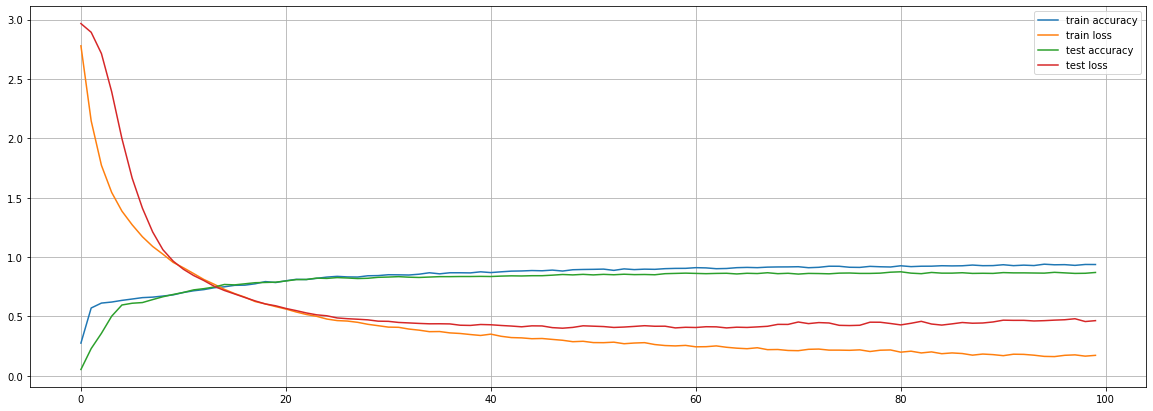

In [38]:
plt.figure(figsize= (20,7))

plt.plot(train_acc, label = "train accuracy")
plt.plot( train_loss, label = "train loss" )
plt.plot( test_acc, label = "test accuracy" )
plt.plot( test_loss, label = "test loss" )
plt.legend()
plt.grid()
plt.show()

<p>
    From the above results we see that model is not underfitting as the traing accuracy is increasing for every iteration. Model doesnot over fit as well as the difference between the traing accuracy and the test accuracy is minimal
</p>

In [39]:
train_accuracy = accuracy_score( torch.argmax( model(X_train), dim =1), y_train) 
test_accuracy = accuracy_score( torch.argmax( F.softmax(model(X_test)), dim =1), y_test) 

print(f"The Traing accuaracy is {train_accuracy} \nThe Test accuracy is {test_accuracy}  ")

The Traing accuaracy is 0.9696739954510993 
The Test accuracy is 0.8704545454545455  


<p>
    As we see here, the machine learning models are unable to generate correct predictions contrary to that, deep learning model are capable of generating better predictions. This shows that deep learning models are capable of learning patterns in a robust and detailed manner
</p>

<hr>

# Generate Predictions 

<p>
    The Testing data has to be of the dame format as the tring data. We here, have implemented all the data transformation that were used on the traing set 
</p>

In [40]:
# Load the test data points 

df = pd.read_csv("cs98x-22-dl-task2/test.csv")
Id = df.iloc[:, 0].values.astype(np.int32)

# feature selection
df.drop( labels= features_to_drop , axis= 1, inplace= True )
df.drop( labels= ['id'] , axis= 1, inplace= True )
df = df.dropna()

df.head()

,age,Medu,Fedu,Mjob,Fjob,reason,studytime,freetime,goout,Walc,health,G1,G2
0,16,3,1,health,other,home,1,5,3,1,4,9,12
1,15,4,4,other,other,home,1,3,3,1,4,14,9
2,19,3,1,health,at_home,home,1,3,2,4,4,11,13
3,14,1,0,services,other,course,2,0,2,1,2,13,11
4,14,3,1,at_home,at_home,home,1,2,0,2,4,12,13


In [41]:
# Label Encode the Values

for i in df.select_dtypes(np.object).columns:
    
    df[i] = la_dct[i].transform(df[i].values)
    
df.head()

,age,Medu,Fedu,Mjob,Fjob,reason,studytime,freetime,goout,Walc,health,G1,G2
0,16,3,1,1,2,1,1,5,3,1,4,9,12
1,15,4,4,2,2,1,1,3,3,1,4,14,9
2,19,3,1,1,0,1,1,3,2,4,4,11,13
3,14,1,0,3,2,0,2,0,2,1,2,13,11
4,14,3,1,0,0,1,1,2,0,2,4,12,13


In [42]:
# Feature Extraction

n = 6
most_valued_data_points = pca.transform(df.iloc[:, :].values)
df = pd.DataFrame(data = most_valued_data_points , columns = [ f"PC-{i}" for i in range(n)] )

df.head()

,PC-0,PC-1,PC-2,PC-3,PC-4,PC-5
0,2.185807,-3.200304,3.190089,0.573606,1.781853,-1.733749
1,-1.813374,1.027539,2.597207,0.394871,1.000554,-1.515233
2,2.174707,-0.902600,1.693164,3.757628,0.842266,-1.070295
3,0.238620,0.409401,1.927759,-0.891866,-0.773579,0.758285
4,2.203271,-0.059701,1.798815,2.388635,1.459602,-1.032771


In [43]:
# Store the results in the dataFrame
res = pd.DataFrame()
res['id'] = Id

# scale the data 
df = scalar.transform(df.values)

# convert to tensor
df =  torch.tensor(df).float()


res['grade'] =  pd.DataFrame( torch.argmax(model(df),axis = 1) )
res = res.dropna()
# Save the csv file with name as "results" and file extention ".csv"
res.to_csv( 'neural_network_1.csv' , index = False)

<hr>

# References

<ol>
    <li> Pandas.pydata.org. 2022. pandas.DataFrame — pandas 1.4.2 documentation. [online] Available at: <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html"> link </a>[Accessed 7 April 2022]. </li>
    <li> Medium. 2022. Data Splitting for Model Evaluation. [online] Available at:  <a href="https://towardsdatascience.com/data-splitting-for-model-evaluation-d9545cd04a99"> link </a>[Accessed 6 April 2022]. </li>
    <li> Medium. 2022. Outlier detection 101: Median and Interquartile range.. [online] Available at: <a href = "https://medium.com/@davidnh8/outlier-detection-101-median-and-interquartile-range-cc9dde94c0ac"> link </a> [Accessed 2 April 2022]. </li>
    <li> Medium. 2022. Understanding PyTorch with an example: a step-by-step tutorial. [online] Available at: <a href = "https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e"> link </a> [Accessed 2 April 2022]. </li>
    <li> Medium. 2022. A One-Stop Shop for Principal Component Analysis. [online] Available at: <a href = "https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c"> link </a> [Accessed 5 April 2022]. </li>
    <li> Medium. 2022. Data Preprocessing. [online] Available at: <a href = "https://medium.com/@yogeshojha/data-preprocessing-75485c7188c4">link </a> [Accessed 5 April 2022]. </li>
    <li> Pytorch.org. 2022. PyTorch documentation — PyTorch 1.11.0 documentation. [online] Available at: <a href = "https://pytorch.org/docs/stable/index.html"> link </a> [Accessed 13 March 2022]. </li>
    <li> Scikit-learn.org. 2022. scikit-learn: machine learning in Python — scikit-learn 1.0.2 documentation. [online] Available at: <a href = "https://scikit-learn.org/stable/"> link </a> [Accessed 20 March 2022]. </li>
</ol>